# Public Key Cryptography II

## 1 Elliptic curve over real numbers $\mathbb{R}$

Given the elliptic curve $E\ :\ y^2 =x^3−3x+9$. If this curve is not singular (check this), compute $a$ and $b$, such that $P_1 = (0,a)$ and $P_2 = (2,b)$ lay on $E$. Compute $P = P_1 +P_2$ and draw $E$ together with $P_1$ , $P_2$ and $P$.

not singular:

$4a^3+27b^2 \neq 0$

$4*(-3)^3+27*9^2 = -4*27 + 27*81 = 27*(81-4) \neq 0$

P1:

$y^2 = 0^3-3*0+9 => x = \pm 3$

P2:

$y^2 = 2^3-3*2+9 = 8 - 6 + 9 = 11 => x = \pm 3.3166$

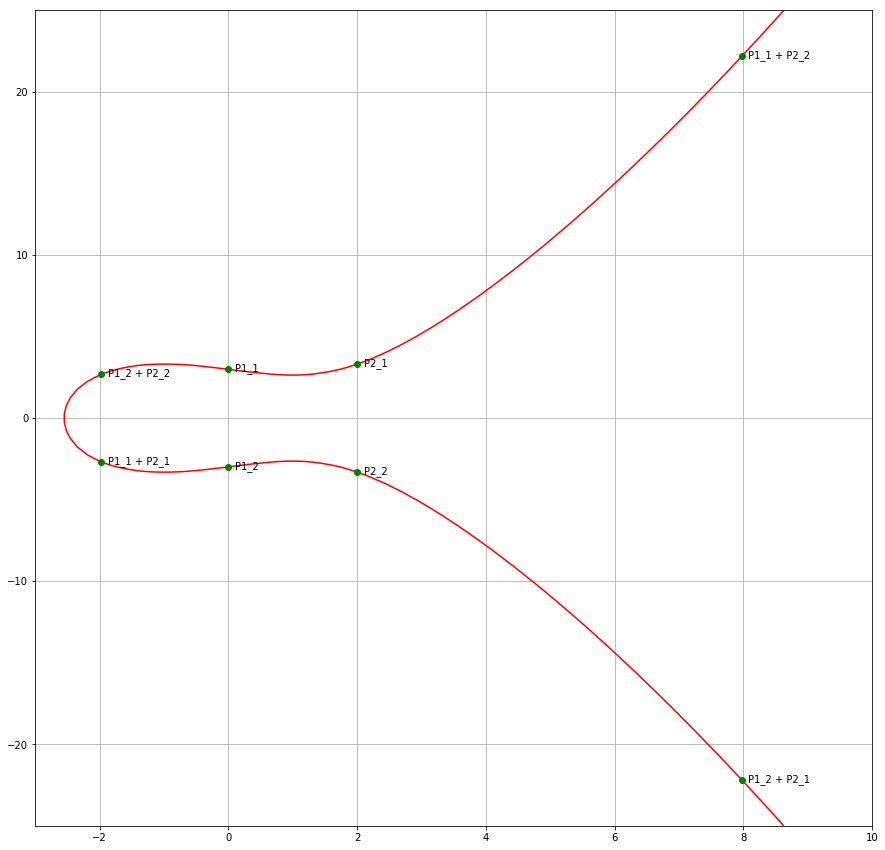

In [23]:
a = -3
b = 9

def addpoints(P1, P2):
    x1 = P1[0]
    y1 = P1[1]
    x2 = P2[0]
    y2 = P2[1]
    
    if x1 == x2 and y1 == y2:
        s = (3*x1**2+a)/(2*y1)
    else:
        s = (y2 - y1)/(x2 - x1)
        
    x3 = s**2 - x1 - x2
    y3 = s*(x1 - x3) - y1
    
    return (x3, y3)

import matplotlib.pyplot as plt
import math

plt.figure(figsize=(15,15))

# plot elliptic curve
xlist = np.linspace(-3, 10, 100)
ylist = np.linspace(-25, 25, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = Y**2 - X**3 - a*X - b
plt.contour(X, Y, Z, [0], colors='red',)

P1_1 = (0,3)
P1_2 = (0,-3)
P2_1 = (2,math.sqrt(11))
P2_2 = (2,-math.sqrt(11))

P1_1_2_1 = addpoints(P1_1, P2_1)
P1_1_2_2 = addpoints(P1_1, P2_2)
P1_2_2_1 = addpoints(P1_2, P2_1)
P1_2_2_2 = addpoints(P1_2, P2_2)

plt.plot(P1_1[0], P1_1[1], 'go')
plt.annotate('P1_1', (P1_1[0]+0.1, P1_1[1]-0.1))

plt.plot(P1_2[0], P1_2[1], 'go')
plt.annotate('P1_2', (P1_2[0]+0.1, P1_2[1]-0.1))

plt.plot(P2_1[0], P2_1[1], 'go')
plt.annotate('P2_1', (P2_1[0]+0.1, P2_1[1]-0.1))

plt.plot(P2_2[0], P2_2[1], 'go')
plt.annotate('P2_2', (P2_2[0]+0.1, P2_2[1]-0.1))

plt.plot(P1_1_2_1[0], P1_1_2_1[1], 'go')
plt.annotate('P1_1 + P2_1', (P1_1_2_1[0]+0.1, P1_1_2_1[1]-0.1))

plt.plot(P1_1_2_2[0], P1_1_2_2[1], 'go')
plt.annotate('P1_1 + P2_2', (P1_1_2_2[0]+0.1, P1_1_2_2[1]-0.1))

plt.plot(P1_2_2_1[0], P1_2_2_1[1], 'go')
plt.annotate('P1_2 + P2_1', (P1_2_2_1[0]+0.1, P1_2_2_1[1]-0.1))

plt.plot(P1_2_2_2[0], P1_2_2_2[1], 'go')
plt.annotate('P1_2 + P2_2', (P1_2_2_2[0]+0.1, P1_2_2_2[1]-0.1))

plt.grid()
plt.show()

## 2 Elliptic curve over real numbers $\mathbb{R}$

Given the elliptic curve $E\ :\ y^2 = x^3 −3x+5$ and point $P = (2,2.65)\in E$.


__Your Task__: Draw $E$, point $P$ and compute $2P$, $4P$ and $8P$. Solve this problem with minimal computational work!

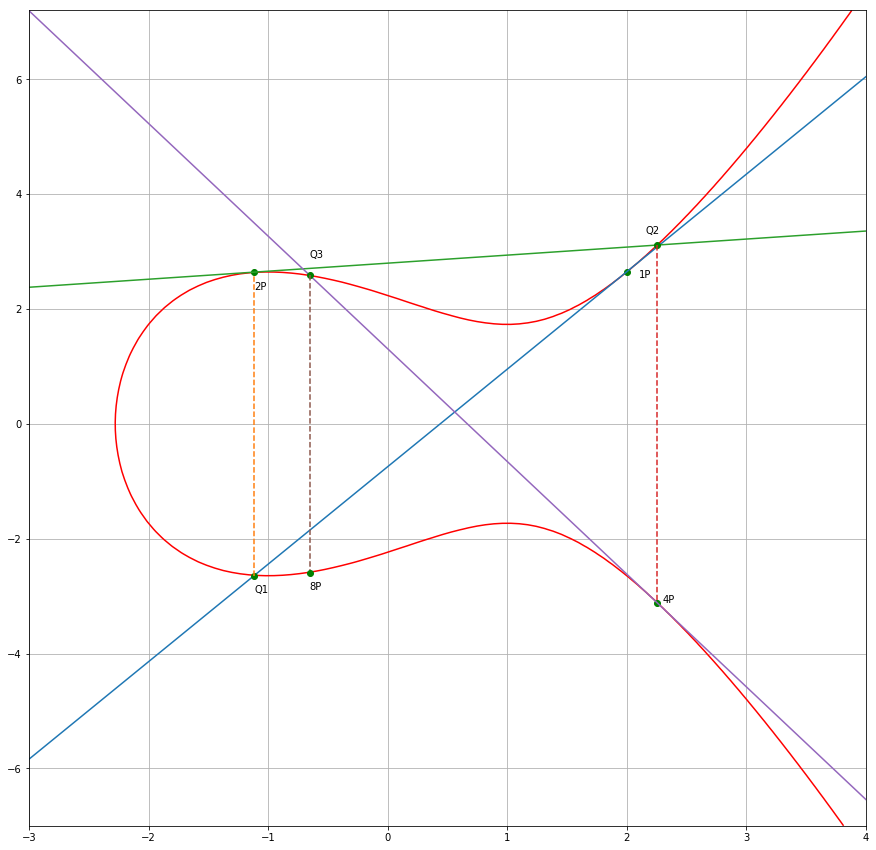

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
a = -3; b = 5
x = 2; y = 2.65

#compute m
m1=(3*x**2+a)/(2*y)

# get intersection point and reflect y
xs1=m1**2-2*x
ys1=-(m1*(xs1-x)+y)

#compute m
m2=(3*xs1**2+a)/(2*ys1)

# get intersection point and reflect y
xs2=m2**2-2*xs1
ys2=-(m2*(xs2-xs1)+ys1)

#compute m
m3=(3*xs2**2+a)/(2*ys2)

# get intersection point and reflect y
xs3=m3**2-2*xs2
ys3=-(m3*(xs3-xs2)+ys2)

# plot elliptic curve
xlist = np.linspace(-3, 4, 100)
ylist = np.linspace(-7.0, 7.2, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = Y**2 - X**3 - a*X - b
plt.contour(X, Y, Z, [0], colors='red',)

# plot 1P
plt.plot(x, y, 'go')
plt.annotate('1P', (x+0.1, y-0.1))

# plot Tangent through 1P
x1 = np.linspace(-3, 4, 100)
plt.plot(x1, (x1-x)*m1+y)

# plot intersection point with tangent and reflective point 2P
plt.plot(xs1, -ys1, 'go')
plt.annotate('Q1', (xs1, -ys1-0.3))
plt.plot([xs1,xs1], [-ys1,ys1], '--')
plt.plot(xs1, ys1, 'go')
plt.annotate('2P', (xs1, ys1-0.3))

# plot Tangent through 2P
x2 = np.linspace(-3, 4, 100)
plt.plot(x2, (x2-xs1)*m2+ys1)

# plot intersection point on ellipse with tangent and reflective point 4P
plt.plot(xs2, -ys2, 'go')
plt.annotate('Q2', (xs2-0.1, -ys2+0.2))
plt.plot([xs2,xs2], [-ys2,ys2],'--')
plt.plot(xs2, ys2, 'go')
plt.annotate('4P', (xs2+0.05, ys2))

# plot Tangent through 4P
x3 = np.linspace(-3, 4, 100)
plt.plot(x3, (x3-xs2)*m3+ys2)

# plot intersection point with tangent and reflective point 4P
plt.plot(xs3, -ys3, 'go')
plt.annotate('Q3', (xs3, -ys3+0.3))
plt.plot([xs3,xs3], [-ys3,ys3], '--')
plt.plot(xs3, ys3, 'go')
plt.annotate('8P', (xs3, ys3-0.3))

plt.grid()
#plt.axis('scaled')
plt.show()

## 3 Singular elliptic curve

Show that the condition $4a^3 +27b^2 \neq 0 \mod p$ is satisfied for the elliptic curve

$$y^2 \equiv x^3 +2x+7 \mod 17$$

For this elliptic curve, the two coefficients are $a,b = 2, 7$, hence the condition is $4\cdot 2^3 + 27\cdot 7^2 \equiv 12 \mod 17$, which means our ECC is non-singular (has no cusps or intersections)

In [1]:
print((4*2**3 + 27 * 7**2)%17)

12


Example of a singular ECC

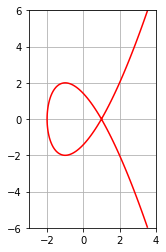

In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = -3
b = 2
xlist = np.linspace( - 3, 4, 100)
ylist = np.linspace( - 6.0, 6.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = Y ** 2 - X ** 3 - a * X - b
plt.contour(X, Y, Z, [0], colors='red') 
plt.grid()
plt.axis('scaled')
plt.show()

## 4 Elliptic curve over finite field $\mathbb{Z}_7$

Let $E\ :\ y^2 \equiv x^3 +3x+2 \mod 7$ an elliptic curve over $\mathbb{Z}_7$.


__Your Task__:
1. Compute all points on $E$ over $\mathbb{Z}_7$.
2. What is the order of the group? (Hint: Do not miss the identity element $O$)
3. Given the element $\alpha = (0,3)$, determine the order of $\alpha$. Is $\alpha$ a primitive element?

In [57]:
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(a, m):
    # If a is negative, replace it with an equivalent positive integer in the same remainder class
    if a < 0:
        a = a + m
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m

def ecc_add(a, b, p, point_1, point_2):
    assert isinstance(point_1, tuple)
    assert isinstance(point_2, tuple)
    x1,y1 = point_1
    x2,y2 = point_2
    if (x1 == x2):
        if (y1 == -y2):
            return (0,0)
        if (y1 == y2 and y1 != 0):
        #else:
            s = ((3*x1**2 + a) * modinv((2*y1), p)) % p
        else:
            return point_1
    else:
        s = ((y2 - y1)* modinv((x2 - x1), p)) % p
    x3 = (s ** 2 - x1 - x2) % p
    y3 = (s * (x1 - x3) - y1) % p
    return (x3,y3)

order = 1

for x in range(0, 7):
    for y in range(0, 7):
        if((y**2)%7==(x**3+3*x+2)%7):
            print("(" + str(x) + ", " + str(y) + ")")
            order +=1
            
print("Order: " + str(order))
print()

alpha = (0,3)
alpha
temp = (0,3)
orderalpha = 2

print(alpha)

for i in range(0,order-1):
    temp = ecc_add(3,2,7, alpha, temp)
    
    if temp[0] == alpha[0] and temp[1] == alpha[1]:
        break
        
    orderalpha += 1
    
    print(temp)
    
print("Order: " + str(orderalpha))

if orderalpha == order:
   print("Is primitive!")

(0, 3)
(0, 4)
(2, 3)
(2, 4)
(4, 1)
(4, 6)
(5, 3)
(5, 4)
Order: 9

(0, 3)
(2, 3)
(5, 4)
(4, 6)
(4, 1)
(5, 3)
(2, 4)
(0, 4)
Order: 9
Is primitive!


## 5 Diffie-Hellman using ECC
Alice and Bob agree to use the elliptic curve $E\ :\ y^2 = x^3 +x+1$ and point $P = (5,4) \in E$. Alice chooses her secret number $a = 5$, whereas Bob chooses $b = 7$.


__Your Task__: Describe the key agreement protocol step by step using the above assumptions about $a$ and $b$. What is the common secret key?

Suppose that the elliptic curve is in mod 23 (23=n) and all points $ \in Z$

|Alice computes $Q_a = a\cdot P \mod n$|Bob computes $Q_b = b\cdot P \mod n$|
| ----- | ------- |
|$Q_a = 5\cdot P \mod n$|$Q_b = 7\cdot P \mod n$|
|$Q_a = 4\cdot P+P \mod n$|$Q_b = 4\cdot P+P+2\cdot P \mod n$|

$m_P= (3x_P^2+a)\cdot (2\cdot y_P)^{-1} \mod n =(3\cdot 5^2+1) \cdot (2*4)^{-1} \mod 23 =76 * 3 \mod 23 =21$

$x_{2\cdot P}=m_P^2-2\cdot x_P \mod n=21^2-2\cdot 5 \mod 23=441-10 \mod 23=17$

$y_{2\cdot P}=m_P*(x_P-x_{2\cdot P})-y_P \mod n=21\cdot (5-17)-4 \mod 23=20$

$2\cdot P=(17,20)$

$m_{2\cdot P}= (3x_{2\cdot P}^2+a) \cdot (2\cdot y_{2\cdot P})^{-1} \mod n =(3\cdot 17^2+1) \cdot (2 \cdot 20)^{-1} \mod 23 =868 \cdot 19 \mod 23 =1$

$x_{4\cdot P}=m_{2\cdot P}^2-2\cdot x_{2\cdot P} \mod n=1^2-2*17 \mod 23=1-34 \mod 23=13$

$y_{4\cdot P}=m_{2\cdot P}\cdot (x_{2\cdot P}-x_{4\cdot P})-y_{2\cdot P} \mod n=-(1\cdot (17-13)-20) \mod 23=7$

$4\cdot P=(13,7)$

$m_{4\cdot P+P}=(y_{4\cdot P}-y_P) \cdot (x_{4\cdot P}-x_P)^{-1} \mod n=(7-4) \cdot (13-5)^{-1} \mod 23=3 \cdot 3 \mod 3=9$

$x_{5\cdot P}=m_{4\cdot P+P}^2-x_{4\cdot P}-x_P \mod n=9^2-13-5 \mod 23=17$

$y_{5\cdot P}=m_{4\cdot P+P}(x_P-x_{4\cdot P+P})-y_P \mod n=9 \cdot (5-17)-4 \mod 23=3$

$5\cdot P=(17,3)=Q_a$

- Alice sends $Q_a$ to Bob as her public key


$m_{5\cdot P+2\cdot P}=(y_{5\cdot P}-y_{2\cdot P}) \cdot (x_{5\cdot P}-x_{2\cdot P})^{-1} \mod n= (-20+3) \cdot (17-17)^{-1} \mod 23 =$ ??????

$x_{7\cdot P}=m_{5\cdot P+P}^2-x_{5\cdot P}-x_{2\cdot P} \mod n=9^2-13-5 \mod 23=17$

$y_{7\cdot P}=m_{5\cdot P+P}(x_{2\cdot P}-x_{5\cdot P+P})-y_{2\cdot P} \mod n=??(17-17)-20 \mod 23=??????$

$7\cdot P=(17,?????)=Q_b$

- Bob sends $Q_b$ to Alice as her public key

|Alice computes $Q_{a\cdot b} = a\cdot Q_b$|Bob computes $Q_{a\cdot b} = b\cdot Q_a$|
| ----- | ------- |
|$Q_{a\cdot b} = 5\cdot Q_b$|$Q_{a\cdot b} = 7\cdot Q_a$|
|$Q_{a\cdot b} = 4\cdot Q_b+Q_b$|$Q_{a\cdot b} = 4\cdot Q_a+Q_a+2\cdot Q_a$|
|Alice gets $Q_{a\cdot b} =(??,??)$|Bob gets$ Q_{a\cdot b} =(??,??)$|


In [10]:
modinv(8,23)

3

## 6 Elliptic Curve Discrete Logarithm Problem (ECDLP)
Assume Mallory intercepts the message $A = (10,6)$ from Alice to Bob and $B = (7,11)$ from Bob to Alice. He also knows the elliptic curve $E\ :\ y^2 \equiv x^3 +2x+2 \mod 17$, which forms a cyclic group of order 19, and point $P = (5,1)$.

__Your Task__: Suppose Mallory wants to know the common key. Describe his steps to find this key!

In [3]:
(5**3+10+2)%17

1

$P$ is therefore located on $E$.

Mallory now calculates the remainder group, with somethin akin to the square-and-multiply algorithm:
$$ 1P = P $$
$$ 2P = P + P $$
$$ 3P = 2P + P $$
$$ 4P = 2P + 2P $$
$$ 5P = 4P + P $$
$$ \vdots $$

In [4]:
def ecc_add(a, b, point_1, point_2):
    assert isinstance(point_1, tuple)
    assert isinstance(point_2, tuple)
    x1,y1 = point_1
    x2,y2 = point_2
    if (x1 == x2):
        if (y1 == -y2):
            return (0,0)
        if (y1 == y2 and y1 != 0):
            s = (3 * x1 ** 2 + a)/(2 * y1)
    else:
        s = (y2 - y1)/(x2 - x1)
    x3 = s ** 2 - x1 - x2
    y3 = s * (x1 - x3) - y1
    return (x3,y3)

def ecc_double(a, b, point):
    assert isinstance(point, tuple)
    return ecc_add(a, b, point, point)

# Test for y^2 = x^3 + 73 (a,b = 1,73), should result in (-3.5555555555, -5.29629629)
print(ecc_double(1,73,(2,9)))

(-3.478395061728395, -5.04338134430727)


And as we are computing in a remainder group we have to change our program as follows:

In [1]:
import math

# Source: https://stackoverflow.com/questions/4798654/modular-multiplicative-inverse-function-in-python
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(a, m):
    # If a is negative, replace it with an equivalent positive integer in the same remainder class
    if a < 0:
        a = a + m
    g, x, y = egcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % m

def ecc_add(a, b, p, point_1, point_2):
    assert isinstance(point_1, tuple)
    assert isinstance(point_2, tuple)
    x1,y1 = point_1
    x2,y2 = point_2
    if (x1 == x2):
        if (y1 == -y2):
            return (0,0)
        if (y1 == y2 and y1 != 0):
            s = ((3 * x1 ** 2 + a) * modinv((2 * y1), p)) % p
    else:
        s = ((y2 - y1)* modinv((x2 - x1), p)) % p
    x3 = (s ** 2 - x1 - x2) % p
    y3 = (s * (x1 - x3) - y1) % p
    return (x3,y3)

def ecc_double(a, b, p, point):
    assert isinstance(point, tuple)
    return ecc_add(a, b, p, point, point)

def ecc_multiply(a,b,p, point, n):
    assert isinstance(point, tuple)
    result = point
    if (n == 0):
        result = (0,0)
    # if n = 1, we just return the point
    if (n != 1):
        # if n is bigger than 1 we differentiate between odd and even n
        if (n%2 == 0):
            result = ecc_multiply(a,b,p,ecc_double(a,b,p,point),n/2)
        else:
            result = ecc_add(a,b,p,ecc_multiply(a,b,p,point, n-1), point)
    return result

# Test for y^2 = x^3 + x + 1 mod 5 (a,b = 1,1), and Generator (0,1) should result in (4,2)
print("Test should result in (4,2): " + str(ecc_double(1,1,5,(0,1))))

a,b,p = 2,2,17
P = (5,1)
for i in range(1,19):
    print(str(i) + "*P: " + str(ecc_multiply(a,b,p, P, i)))

Test should result in (4,2): (4, 2)
1*P: (5, 1)
2*P: (6, 3)
3*P: (10, 6)
4*P: (3, 1)
5*P: (9, 16)
6*P: (16, 13)
7*P: (0, 6)
8*P: (13, 7)
9*P: (7, 6)
10*P: (7, 11)
11*P: (13, 10)
12*P: (0, 11)
13*P: (16, 4)
14*P: (9, 1)
15*P: (3, 16)
16*P: (10, 11)
17*P: (6, 14)
18*P: (5, 16)


As Alice's key $Q_A = n_A\cdot P$ and Bob's $Q_B = n_B \cdot P$, Mallory is able to looks up the corresponding values of $n$ for the points $Q_A = (10,6)$ and $Q_B = (7,11)$. Which are:
$$n_A = 3$$
$$n_B = 10$$

She is thus able to compute the common key $n_A\cdot Q_B = n_B\cdot Q_A = $

In [14]:
print("nA*QB: " + str(ecc_multiply(2,2,17,(7,11),3)))
print("nB*QA: " + str(ecc_multiply(2,2,17,(10,6),10)))

nA*QB: (13, 10)
nB*QA: (13, 10)
